In [62]:
import numpy as np
import pandas as pd

In [63]:
pip install scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [64]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [65]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [66]:
import tensorflow as tf
import keras
from pprint import pprint

In [67]:
overall_stats = pd.read_csv('./../data/ml-100k/u.info', header=None)
print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(overall_stats[0]))
 

Details of users, items and ratings involved in the loaded movielens dataset:  ['943 users', '1682 items', '100000 ratings']


In [68]:
movie_coulmns = ['user id','movie id','rating','timestamp']
ratings_dataset = pd.read_csv('./../data/ml-100k/u.data', sep='\t',header=None,names=movie_coulmns)
ratings_dataset.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [69]:
ratings_dataset.value_counts()

user id  movie id  rating  timestamp
1        1         5       874965758    1
606      91        5       880926610    1
         144       4       880924664    1
         138       3       880927923    1
         135       5       880926245    1
                                       ..
311      747       3       884364502    1
         739       4       884365823    1
         735       4       884366637    1
         732       4       884365617    1
943      1330      3       888692465    1
Name: count, Length: 100000, dtype: int64

### Movies dataset load

In [70]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
movies_data_columns = d.split(' | ')
movies_data_columns
items_dataset = pd.read_csv("./../data/ml-100k/u.item", sep='|',header=None,names=movies_data_columns,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:

movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [72]:
len(items_dataset.groupby(by=movies_data_columns[1:])),len(items_dataset)


(1664, 1682)

### Merged dataset for further observations

In [73]:
merged_dataset = pd.merge(ratings_dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [74]:
merged_dataset[(merged_dataset['movie title'] == 'Chasing Amy (1997)') & (merged_dataset['user id'] == 894)]


,user id,movie id,rating,timestamp,movie title
62716,894,246,4,882404137,Chasing Amy (1997)
90596,894,268,3,879896041,Chasing Amy (1997)


In [75]:
refined_dataset = merged_dataset.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [76]:
refined_dataset.value_counts()

user id  movie title                                 rating
1        101 Dalmatians (1996)                       2.0       1
606      Casablanca (1942)                           5.0       1
         Devil's Advocate, The (1997)                4.0       1
         Desperado (1995)                            4.0       1
         Dead Poets Society (1989)                   4.0       1
                                                              ..
311      Star Trek III: The Search for Spock (1984)  5.0       1
         Stand by Me (1986)                          4.0       1
         Speed (1994)                                5.0       1
         Speechless (1994)                           3.0       1
943      Young Guns II (1990)                        3.0       1
Name: count, Length: 99693, dtype: int64

### Encoding users and movie titles is crucial for several important reasons:

- Neural Network Requirements:

  - DNNs require numerical inputs
  - Input features must be in a continuous sequence (no gaps)
  - Missing values can cause training issues


- Memory Efficiency:

  - Converts potentially long string IDs into compact integer indices
  - Reduces memory usage during training
  - Speeds up computations


- Handling Cold Start:

  - Enables handling of new users and movies not seen during training
  - Provides a systematic way to assign new IDs to unknown entities


- Model Performance:

  - Consistent encoding helps prevent data leakage
  - Maintains the relationship between users and movies
  - Enables proper embedding layer initialization


- Training Stability:

  - Sequential IDs ensure consistent embedding lookups
  - Prevents sparse or skipped indices that could affect model convergence
  - Makes batch processing more efficient





In [77]:
user_enc = LabelEncoder()
refined_dataset['user'] = user_enc.fit_transform(refined_dataset['user id'].values)
n_users = refined_dataset['user'].nunique()
n_users

943

In [78]:
movie_enc = LabelEncoder()
refined_dataset['movie'] = movie_enc.fit_transform(refined_dataset['movie title'].values)
n_movies = refined_dataset['movie'].nunique()


In [79]:
refined_dataset['rating'] = refined_dataset['rating'].values.astype(np.float32)
min_rating = min(refined_dataset['rating'])
max_rating = max(refined_dataset['rating'])
n_users, n_movies, min_rating, max_rating

(943, 1664, 1.0, 5.0)

In [80]:
refined_dataset.head()


,user id,movie title,rating,user,movie
0,1,101 Dalmatians (1996),2.0,0,2
1,1,12 Angry Men (1957),5.0,0,3
2,1,"20,000 Leagues Under the Sea (1954)",3.0,0,6
3,1,2001: A Space Odyssey (1968),4.0,0,7
4,1,"Abyss, The (1989)",3.0,0,16


### Splitting the dataset into Test and Training

In [81]:
X = refined_dataset[['user', 'movie']].values
Y = refined_dataset['rating'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=50)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((89723, 2), (9970, 2), (89723,), (9970,))

In [82]:
Y_train.shape

(89723,)

In [83]:
n_factors = 150


X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [84]:
X_train, X_train_array, X_train_array[0].shape


(array([[ 180, 1152],
        [ 487,  389],
        [ 177,  302],
        ...,
        [ 431, 1588],
        [ 232,  399],
        [ 138,  612]]),
 [array([180, 487, 177, ..., 431, 232, 138]),
  array([1152,  389,  302, ..., 1588,  399,  612])],
 (89723,))

### Normalizing the labels


In [85]:
Y_train = (Y_train - min_rating)/(max_rating - min_rating)
Y_test = (Y_test - min_rating)/(max_rating - min_rating)

### Softmax deep neural network


In [86]:
import tensorflow as tf
from tensorflow import keras

In [87]:


# # User input and embedding
user = tf.keras.layers.Input(shape=(1,), dtype='int32', name='user_input')

u = tf.keras.layers.Embedding(
    input_dim=n_users,
    output_dim=n_factors,
    embeddings_initializer=tf.keras.initializers.HeNormal(),
    embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
)(user)
u = tf.keras.layers.Reshape((n_factors,))(u)

# Movie input and embedding
movie = tf.keras.layers.Input(shape=(1,), dtype='int32')  # Added dtype here too

m = keras.layers.Embedding(
    input_dim=n_movies,
    output_dim=n_factors,
    embeddings_initializer='he_normal',
    embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
)(movie)
m = tf.keras.layers.Reshape((n_factors,))(m) 

## Rest of the model remains the same
x = tf.keras.layers.Concatenate()([u,m])
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(32, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(16, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(9)(x)
x = tf.keras.layers.Activation(activation='softmax')(x)  # Fixed: lowercase 'softmax'

model = tf.keras.models.Model(inputs=[user,movie], outputs=x)


model.compile(optimizer="Adagrad", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])



In [88]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 150)    │    141,450 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 150)    │    249,600 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 150)       │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 150)       │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 300)       │          0 │ reshape_2[0][0],  │
│ (Concatenate)       │                   │            │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 300)       │          0 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      9,632 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 32)        │          0 │ dense_3[0][0]     │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 32)        │          0 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 16)        │        528 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 16)        │          0 │ dense_4[0][0]     │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 16)        │          0 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 9)         │        153 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 9)         │          0 │ dense_5[0][0]     │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 401,363 (1.53 MB)

 Trainable params: 401,363 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss', 
#     factor=0.75, 
#     patience=3, 
#     min_lr=0.000001, 
#     verbose=1)

# checkpoint = tf.keras.callbacks.ModelCheckpoint(
#     'best_model.keras',
#     monitor='val_loss',
#     save_best_only=True,
#     mode='auto'
# )

# history = model.fit(x = X_train_array, y = Y_train, batch_size=128, epochs=70, verbose=1, validation_data=(X_test_array, Y_test)
# ,shuffle=True,callbacks=[reduce_lr, checkpoint])

# Learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.75,
    patience=3,
    min_lr=0.00001,  # 0.000001,
    verbose=1,
    min_delta=1e-4  # Minimum change to qualify as an improvement
)

# Model checkpoint callback
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1,
    save_weights_only=False  # Save the entire model
)

# Training the model with proper input format
history = model.fit(x = X_train_array, 
                    y = Y_train, 
                    batch_size=128, 
                    epochs=80, 
                    verbose=1, 
                    validation_data=(X_test_array, Y_test),
                    shuffle=True,
                    callbacks=[reduce_lr, checkpoint]
                    )

Epoch 1/80


/Users/anuragsharma/.pyenv/versions/movie_recommend/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'keras_tensor_17']. Received: the structure of inputs=('*', '*')
  warnings.warn(


692/701 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0469 - loss: 2.1510
Epoch 1: val_loss improved from inf to 2.00770, saving model to best_model.keras
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0471 - loss: 2.1503 - val_accuracy: 0.0645 - val_loss: 2.0077 - learning_rate: 0.0010
Epoch 2/80
691/701 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0670 - loss: 1.9699
Epoch 2: val_loss improved from 2.00770 to 1.84147, saving model to best_model.keras
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0670 - loss: 1.9692 - val_accuracy: 0.0619 - val_loss: 1.8415 - learning_rate: 0.0010
Epoch 3/80
691/701 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0641 - loss: 1.7992
Epoch 3: val_loss improved from 1.84147 to 1.65296, saving model to best_model.keras
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0641 - loss: 1.7984 - val_accuracy: 0.0617 - val_loss: 1.6530 - learning_rate: 0.0010
Epoch 4/80
692/701 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0621 - loss: 

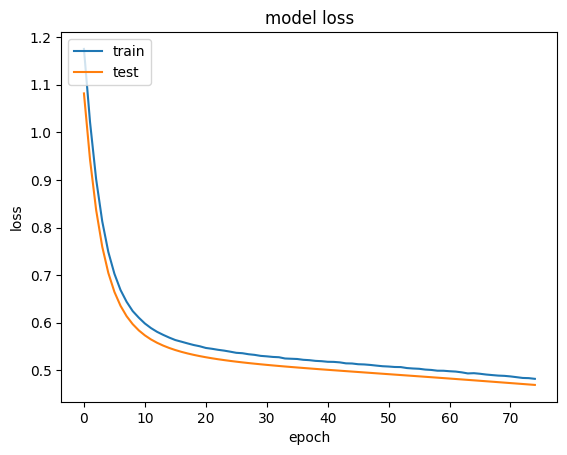

In [90]:
plt.plot(history.history["loss"][5:])
plt.plot(history.history["val_loss"][5:])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

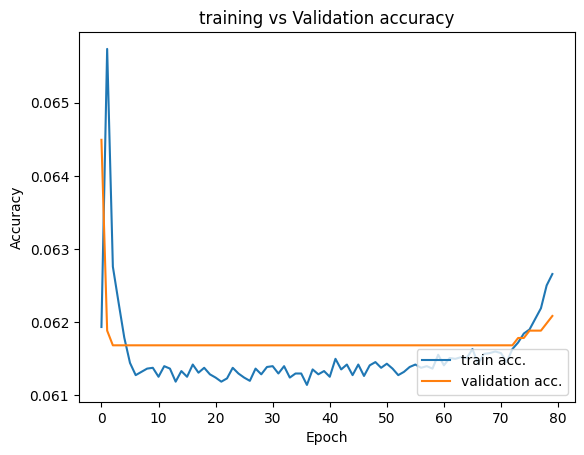

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("training vs Validation accuracy")
plt.legend(['train acc.','validation acc.'], loc = 'lower right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [92]:
refined_dataset.head()


,user id,movie title,rating,user,movie
0,1,101 Dalmatians (1996),2.0,0,2
1,1,12 Angry Men (1957),5.0,0,3
2,1,"20,000 Leagues Under the Sea (1954)",3.0,0,6
3,1,2001: A Space Odyssey (1968),4.0,0,7
4,1,"Abyss, The (1989)",3.0,0,16


In [93]:
X_train_array

[array([180, 487, 177, ..., 431, 232, 138]),
 array([1152,  389,  302, ..., 1588,  399,  612])]

In [94]:
user_id = [777]
encoded_user_id = user_enc.transform(user_id)

seen_movies = list(refined_dataset[refined_dataset['user id'] == user_id[0]]['movie'])
print(seen_movies)

[7, 55, 87, 113, 313, 337, 389, 390, 399, 411, 432, 460, 498, 528, 580, 604, 612, 643, 666, 783, 996, 1005, 1032, 1102, 1132, 1157, 1190, 1208, 1251, 1260, 1284, 1302, 1342, 1523, 1558, 1615]


In [95]:
len(refined_dataset['movie'].unique()), min(refined_dataset['movie']), max(refined_dataset['movie'])


(1664, 0, 1663)

In [96]:

unseen_movies = [i for i in range(min(refined_dataset['movie']), max(refined_dataset['movie'])+1) if i not in seen_movies]
print(unseen_movies)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 

In [97]:
len(unseen_movies) + len(seen_movies)


1664

In [98]:
model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies)]
len(model_input), len(model_input[0])

(2, 1628)

In [99]:
predicted_ratings = model.predict(model_input)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/anuragsharma/.pyenv/versions/movie_recommend/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'keras_tensor_17']. Received: the structure of inputs=('*', '*')
  warnings.warn(


In [100]:
print(predicted_ratings.shape)


(1628, 9)


In [101]:
print(predicted_ratings)


[[0.73390263 0.2526138  0.00178831 ... 0.00160309 0.00316519 0.00430677]
 [0.6953077  0.29167435 0.00176913 ... 0.00168029 0.00296172 0.00402286]
 [0.76834124 0.22390686 0.00088978 ... 0.00084439 0.00211288 0.00257768]
 ...
 [0.70411897 0.28174323 0.00183392 ... 0.00174734 0.00340847 0.00435189]
 [0.70602876 0.2803167  0.00188517 ... 0.00170725 0.00323816 0.00413364]
 [0.7447327  0.24632858 0.00105109 ... 0.00103122 0.00237836 0.00290229]]


In [102]:
predicted_ratings = np.max(predicted_ratings, axis=1)
predicted_ratings
predicted_ratings.shape
sorted_index = np.argsort(predicted_ratings)[::-1]
print(sorted_index)
recommended_movies = movie_enc.inverse_transform(sorted_index)
recommended_movies

[ 840  553  998 ...  445 1251 1365]


array(['Last Klezmer: Leopold Kozlowski, His Life and Music, The (1995)',
       'Four Rooms (1995)', 'Moonlight and Valentino (1995)', ...,
       'Duoluo tianshi (1995)', 'Rock, The (1996)',
       'Sound of Music, The (1965)'], dtype=object)

In [103]:

from pprint import pprint
pprint(list(recommended_movies[:20]))

['Last Klezmer: Leopold Kozlowski, His Life and Music, The (1995)',
 'Four Rooms (1995)',
 'Moonlight and Valentino (1995)',
 'Two or Three Things I Know About Her (1966)',
 'Bride of Frankenstein (1935)',
 'Mercury Rising (1998)',
 'Damsel in Distress, A (1937)',
 "I'll Do Anything (1994)",
 'River Wild, The (1994)',
 'Further Gesture, A (1996)',
 'Little Lord Fauntleroy (1936)',
 'Big Squeeze, The (1996)',
 'Star Wars (1977)',
 "Singin' in the Rain (1952)",
 'To Cross the Rubicon (1991)',
 'Designated Mourner, The (1997)',
 'Mallrats (1995)',
 'Family Thing, A (1996)',
 "Ed's Next Move (1996)",
 'Fille seule, La (A Single Girl) (1995)']


In [104]:
def recommender_system(user_id, model, n_movies):

  print("")
  print("Movie seen by the User:")
  pprint(list(refined_dataset[refined_dataset['user id'] == user_id]['movie title']))
  print("")

  encoded_user_id = user_enc.transform([user_id])

  seen_movies = list(refined_dataset[refined_dataset['user id'] == user_id]['movie'])
  unseen_movies = [i for i in range(min(refined_dataset['movie']), max(refined_dataset['movie'])+1) if i not in seen_movies]
  model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies)]
  predicted_ratings = model.predict(model_input)
  predicted_ratings = np.max(predicted_ratings, axis=1)
  sorted_index = np.argsort(predicted_ratings)[::-1]
  recommended_movies = movie_enc.inverse_transform(sorted_index)
  print("---------------------------------------------------------------------------------")
  print("Top "+str(n_movies)+" Movie recommendations for the User "+str(user_id)+ " are:")
  pprint(list(recommended_movies[:n_movies]))
     

In [105]:
user_id= 45
n_movies = 10
recommender_system(user_id,model,n_movies)



Movie seen by the User:
['101 Dalmatians (1996)',
 'Adventures of Pinocchio, The (1996)',
 'Beautiful Girls (1996)',
 'Bed of Roses (1996)',
 'Birdcage, The (1996)',
 'Blue in the Face (1995)',
 "Don't Be a Menace to South Central While Drinking Your Juice in the Hood "
 '(1996)',
 'Down Periscope (1996)',
 'Dragonheart (1996)',
 'Eraser (1996)',
 'Evening Star, The (1996)',
 'Fargo (1996)',
 'Father of the Bride Part II (1995)',
 'First Wives Club, The (1996)',
 'Godfather, The (1972)',
 'Happy Gilmore (1996)',
 'Hercules (1997)',
 'Hunchback of Notre Dame, The (1996)',
 'If Lucy Fell (1996)',
 'Independence Day (ID4) (1996)',
 'James and the Giant Peach (1996)',
 'Jerry Maguire (1996)',
 'Kids in the Hall: Brain Candy (1996)',
 'Leaving Las Vegas (1995)',
 'Men in Black (1997)',
 'Mighty Aphrodite (1995)',
 "Mr. Holland's Opus (1995)",
 'Mulholland Falls (1996)',
 'Muppet Treasure Island (1996)',
 'Mystery Science Theater 3000: The Movie (1996)',
 'Nutty Professor, The (1996)',
 'Ph

In [106]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [107]:
def calculate_rmse(y_true, y_pred):
    """Calculate Root Mean Square Error"""
    return sqrt(mean_squared_error(y_true, y_pred))

def calculate_mae(y_true, y_pred):
    """Calculate Mean Absolute Error"""
    return mean_absolute_error(y_true, y_pred)

def calculate_mrr(actual, predicted, k=10):
    """
    Calculate Mean Reciprocal Rank
    """
    mrr_sum = 0
    for act, pred in zip(actual, predicted[:k]):
        if act in pred:
            rank = pred.index(act) + 1
            mrr_sum += 1.0 / rank
    return mrr_sum / len(actual) if len(actual) > 0 else 0

def precision_at_k(actual, predicted, k=10):
    """
    Calculate Precision@K
    """
    if len(predicted) > k:
        predicted = predicted[:k]
    
    num_hits = 0
    for item in predicted:
        if item in actual:
            num_hits += 1
    
    return num_hits / k if k != 0 else 0

def recall_at_k(actual, predicted, k=10):
    """
    Calculate Recall@K
    """
    if len(predicted) > k:
        predicted = predicted[:k]
    
    num_hits = 0
    for item in predicted:
        if item in actual:
            num_hits += 1
    
    return num_hits / len(actual) if len(actual) != 0 else 0

In [108]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

def calculate_rmse(y_true, y_pred):
    """Calculate Root Mean Square Error"""
    return sqrt(mean_squared_error(y_true, y_pred))

def calculate_mae(y_true, y_pred):
    """Calculate Mean Absolute Error"""
    return mean_absolute_error(y_true, y_pred)

def calculate_mrr(predictions, actual_items, k=10):
    """
    Calculate Mean Reciprocal Rank
    predictions: sorted list of recommended items
    actual_items: list of actual relevant items
    """
    if not actual_items:
        return 0.0
    
    for rank, item in enumerate(predictions[:k], 1):
        if item in actual_items:
            return 1.0 / rank
    return 0.0

def precision_recall_at_k(predictions, actual_items, k=10):
    """
    Calculate Precision and Recall at k
    predictions: sorted list of recommended items
    actual_items: list of actual relevant items
    """
    pred_k = predictions[:k]
    num_hits = len(set(pred_k) & set(actual_items))
    
    precision = num_hits / k if k > 0 else 0
    recall = num_hits / len(actual_items) if actual_items else 0
    
    return precision, recall

def calculate_metrics(model, X_test, y_test, k=10):
    """Calculate all metrics for the model"""
    # Get predictions
    y_pred = model.predict([X_test[:, 0], X_test[:, 1]])
    y_pred_max = np.max(y_pred, axis=1)
    
    # Calculate RMSE and MAE
    rmse = calculate_rmse(y_test, y_pred_max * 4.0 + 1.0)  # Scale back to 1-5
    mae = calculate_mae(y_test, y_pred_max * 4.0 + 1.0)
    
    # Group by user
    users = np.unique(X_test[:, 0])
    mrr_scores = []
    precision_scores = []
    recall_scores = []
    
    for user in users:
        # Get user's data
        user_mask = X_test[:, 0] == user
        user_items = X_test[user_mask, 1]
        user_ratings = y_test[user_mask]
        user_preds = y_pred_max[user_mask]
        
        # Get actual relevant items (rated >= 4)
        relevant_items = user_items[user_ratings >= 4].tolist()
        
        # Get predicted recommendations
        rec_indices = np.argsort(user_preds)[::-1]
        recommended_items = user_items[rec_indices].tolist()
        
        # Calculate metrics
        if relevant_items:  # Only calculate if user has relevant items
            mrr = calculate_mrr(recommended_items, relevant_items, k)
            precision, recall = precision_recall_at_k(recommended_items, relevant_items, k)
            
            mrr_scores.append(mrr)
            precision_scores.append(precision)
            recall_scores.append(recall)
    
    # Average the metrics
    avg_mrr = np.mean(mrr_scores) if mrr_scores else 0
    avg_precision = np.mean(precision_scores) if precision_scores else 0
    avg_recall = np.mean(recall_scores) if recall_scores else 0
    
    metrics = {
        'RMSE': rmse,
        'MAE': mae,
        'MRR@K': avg_mrr,
        'Precision@K': avg_precision,
        'Recall@K': avg_recall
    }
    
    return metrics

# Test the metrics
k_values = [5, 10, 15, 20]
for k in k_values:
    print(f"\nMetrics at K={k}:")
    metrics = calculate_metrics(model, X_test, Y_test, k)
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Metrics at K=5:
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
RMSE: 3.5901
MAE: 3.5576
MRR@K: 0.0000
Precision@K: 0.0000
Recall@K: 0.0000

Metrics at K=10:
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
RMSE: 3.5901
MAE: 3.5576
MRR@K: 0.0000
Precision@K: 0.0000
Recall@K: 0.0000

Metrics at K=15:
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
RMSE: 3.5901
MAE: 3.5576
MRR@K: 0.0000
Precision@K: 0.0000
Recall@K: 0.0000

Metrics at K=20:
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
RMSE: 3.5901
MAE: 3.5576
MRR@K: 0.0000
Precision@K: 0.0000
Recall@K: 0.0000


In [109]:
k = 10  # Define K for the ranking metrics
metrics = calculate_all_metrics(model, [X_test[:, 0], X_test[:, 1]], Y_test, k)

print("\nMetrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"MRR@{k}: {metrics['MRR@K']:.4f}")
print(f"Precision@{k}: {metrics['Precision@K']:.4f}")
print(f"Recall@{k}: {metrics['Recall@K']:.4f}")

312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step

Metrics:
RMSE: 3.5901
MAE: 3.5576
MRR@10: 0.0000
Precision@10: 0.0000
Recall@10: 0.0000


In [110]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [112]:
def plot_metrics_over_k(model, X_test, y_test, k_values=None):
    if k_values is None:
        k_values = [5, 10, 15, 20, 25, 30]
    
    # Initialize metrics storage
    metrics_data = {
        'K': k_values,
        'RMSE': [],
        'MAE': [],
        'MRR': [],
        'Precision': [],
        'Recall': []
    }
    
    # Calculate metrics for each k
    for k in k_values:
        metrics = calculate_all_metrics(model, [X_test[:, 0], X_test[:, 1]], y_test, k)
        metrics_data['RMSE'].append(metrics['RMSE'])
        metrics_data['MAE'].append(metrics['MAE'])
        metrics_data['MRR'].append(metrics['MRR@K'])
        metrics_data['Precision'].append(metrics['Precision@K'])
        metrics_data['Recall'].append(metrics['Recall@K'])
    
    # Create figure with subplots
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 10))
    gs = GridSpec(2, 2, figure=fig)
    
    # 1. Error Metrics Plot (RMSE & MAE)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(k_values, metrics_data['RMSE'], 'b-o', label='RMSE')
    ax1.plot(k_values, metrics_data['MAE'], 'r-o', label='MAE')
    ax1.set_xlabel('K Value')
    ax1.set_ylabel('Error')
    ax1.set_title('Error Metrics vs K')
    ax1.legend()
    ax1.grid(True)
    
    # 2. MRR Plot
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(k_values, metrics_data['MRR'], 'g-o')
    ax2.set_xlabel('K Value')
    ax2.set_ylabel('MRR')
    ax2.set_title('Mean Reciprocal Rank vs K')
    ax2.grid(True)
    
    # 3. Precision & Recall Plot
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.plot(k_values, metrics_data['Precision'], 'b-o', label='Precision')
    ax3.plot(k_values, metrics_data['Recall'], 'r-o', label='Recall')
    ax3.set_xlabel('K Value')
    ax3.set_ylabel('Score')
    ax3.set_title('Precision and Recall vs K')
    ax3.legend()
    ax3.grid(True)
    
    # 4. Performance Metrics Bar Chart
    ax4 = fig.add_subplot(gs[1, 1])
    metrics = calculate_all_metrics(model, [X_test[:, 0], X_test[:, 1]], y_test, 10)
    metrics_names = ['RMSE', 'MAE', 'MRR@10', 'P@10', 'R@10']
    metrics_values = [
        metrics['RMSE'],
        metrics['MAE'],
        metrics['MRR@K'],
        metrics['Precision@K'],
        metrics['Recall@K']
    ]
    
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
    ax4.bar(metrics_names, metrics_values, color=colors)
    ax4.set_ylabel('Score')
    ax4.set_title('Performance Metrics Summary')
    ax4.tick_params(axis='x', rotation=45)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # Print numerical results
    print("\nDetailed Metrics Summary:")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MRR@10: {metrics['MRR@K']:.4f}")
    print(f"Precision@10: {metrics['Precision@K']:.4f}")
    print(f"Recall@10: {metrics['Recall@K']:.4f}")

312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


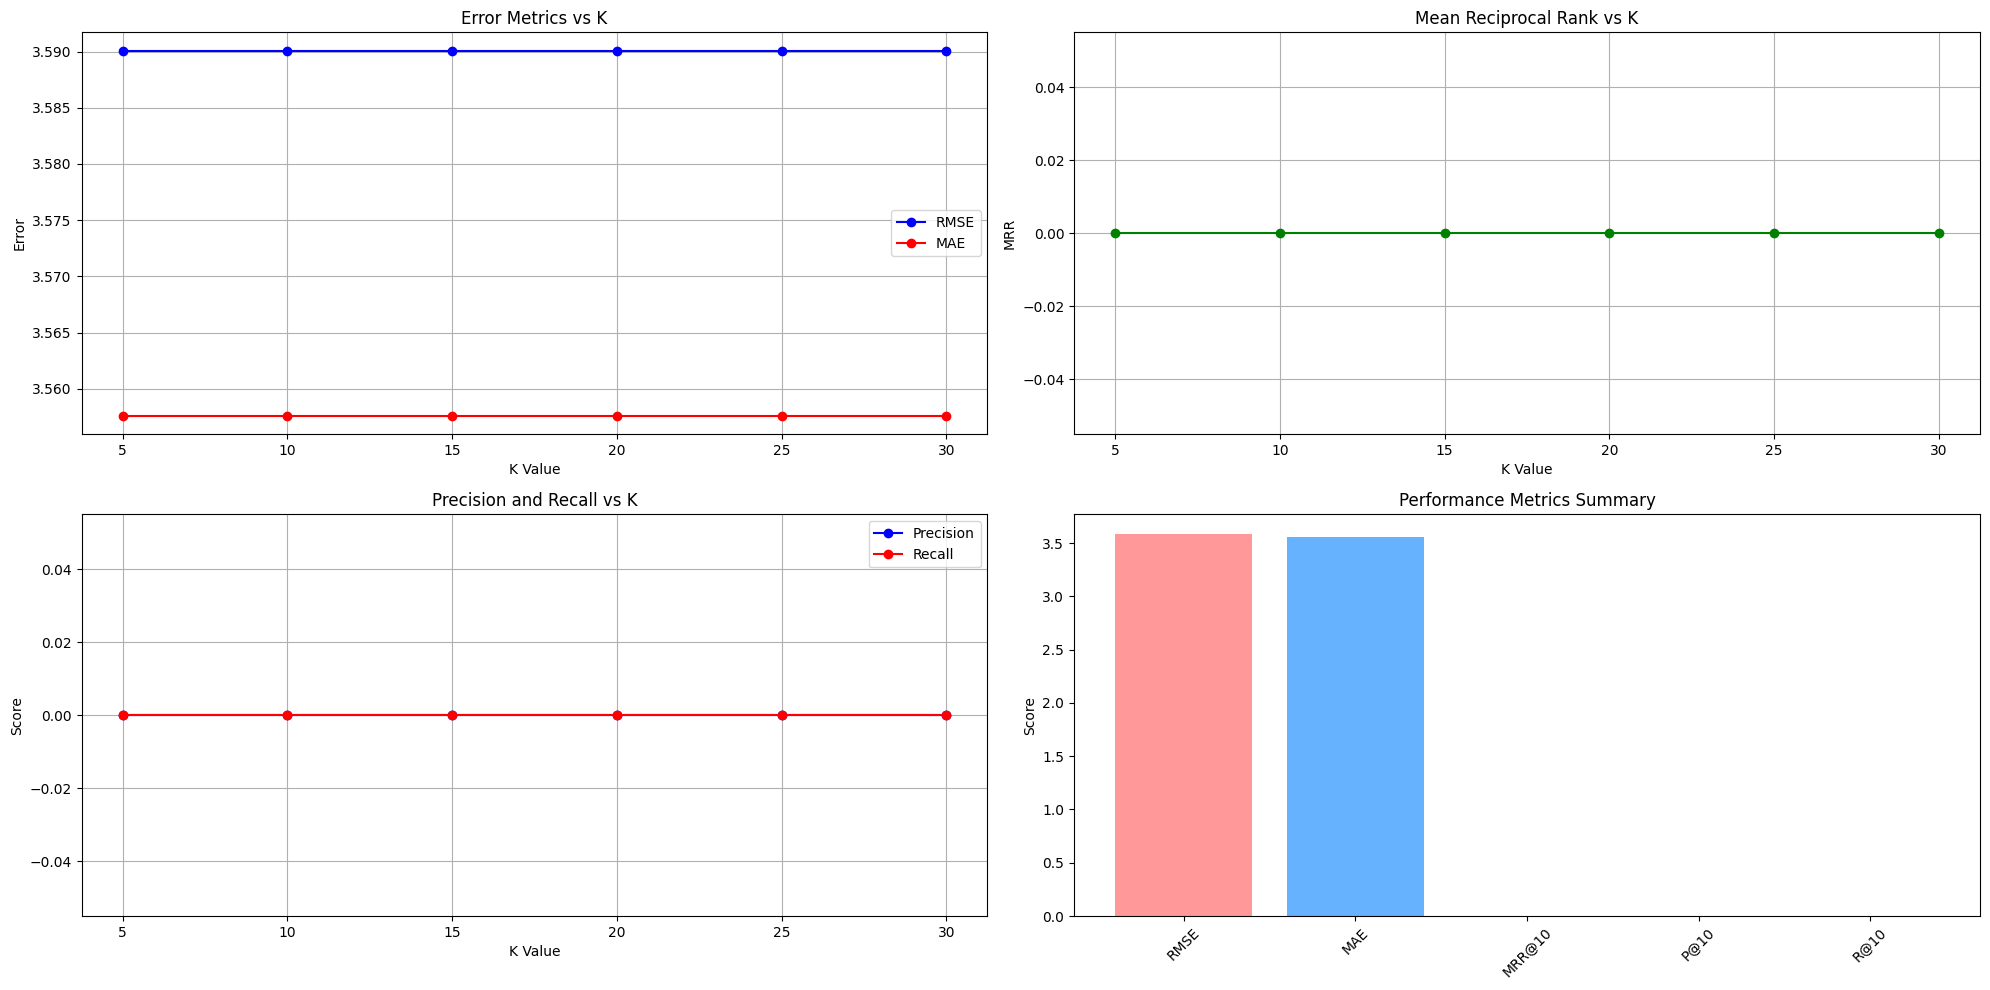


Detailed Metrics Summary:
RMSE: 3.5901
MAE: 3.5576
MRR@10: 0.0000
Precision@10: 0.0000
Recall@10: 0.0000


In [113]:
k_values = [5, 10, 15, 20, 25, 30]
plot_metrics_over_k(model, X_test, Y_test, k_values)